In [1]:
import numpy as np, prjlib, healpy as hp, curvedsky as cs, tools_lens, tools_delens, tools_multitracer, pickle
from matplotlib.pyplot import *

In [29]:
snmin, snmax = 1, 100
nside = 64
lmax = 2*nside
lmin = 20
ntypes = ['base','base_iso','base_la','goal','goal_iso','goal_la']
v = 5e-8

In [9]:
d = prjlib.data_directory()
dobj = {}
for ntype in ntypes:
    Ntype = ntype.replace('_la','')+'_roll50'
    pobj = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=Ntype)
    if '_la' in ntype:
        pE = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype=Ntype)
    else:
        pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=Ntype.replace('_iso',''))
    qobj = tools_lens.init_qobj(pobj.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(pobj,qobj)
    dobj[ntype] = tools_delens.init_template(pobj.stag+qobj.ltag,mobj,pE,False,elmin=50)

In [30]:
dalm = pickle.load(open(dobj['base'].falm['comb'][1],"rb"))[0:lmax+1,0:lmax+1]
dalm[:lmin,:] = 0.

In [31]:
dmap = cs.utils.hp_alm2map(nside,lmax,lmax,dalm)

In [32]:
pid = prjlib.analysis_init(t='id',ntype='cv')
Balm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
Balm[:lmin,:] = 0.

In [33]:
Bmap = cs.utils.hp_alm2map(nside,lmax,lmax,Balm)

In [42]:
W = prjlib.window('sa',nside=nside)[0] * prjlib.window('la',nside=nside)[0]
W[W==0] = np.nan

The loaded SAT mask is further multiplied by hit-count "binary" (not hit count itself)


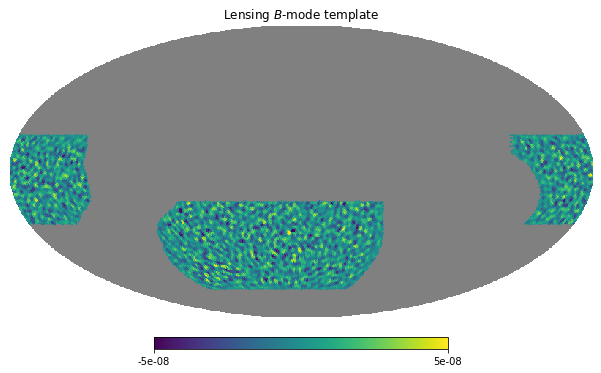

In [49]:
hp.mollview(dmap*W,min=-v,max=v,title=r'Lensing $B$-mode template')
savefig('fig_bmap_template.pdf')

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

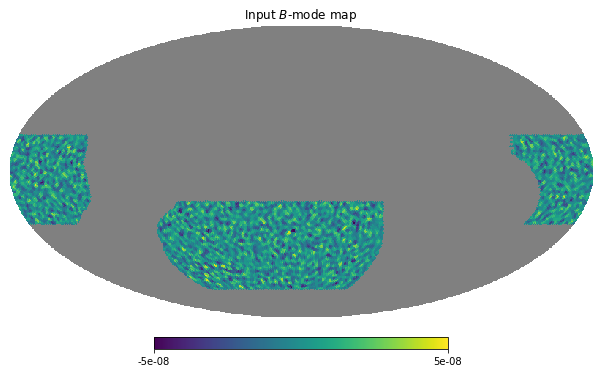

In [50]:
hp.mollview(Bmap*W*.7,min=-v,max=v,title=r'Input $B$-mode map')
savefig('fig_bmap_input.pdf')